In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# step 1: data acquisition 
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print(df.shape)

print(df.columns.values)

print(df.head(10))


(16719, 16)
['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']
                        Name Platform  ...  Developer Rating
0                 Wii Sports      Wii  ...   Nintendo      E
1          Super Mario Bros.      NES  ...        NaN    NaN
2             Mario Kart Wii      Wii  ...   Nintendo      E
3          Wii Sports Resort      Wii  ...   Nintendo      E
4   Pokemon Red/Pokemon Blue       GB  ...        NaN    NaN
5                     Tetris       GB  ...        NaN    NaN
6      New Super Mario Bros.       DS  ...   Nintendo      E
7                   Wii Play      Wii  ...   Nintendo      E
8  New Super Mario Bros. Wii      Wii  ...   Nintendo      E
9                  Duck Hunt      NES  ...        NaN    NaN

[10 rows x 16 columns]


                 Year_of_Release  NA_Sales  ...  Critic_Count  User_Count
Year_of_Release         1.000000 -0.092562  ...      0.223407    0.175339
NA_Sales               -0.092562  1.000000  ...      0.295413    0.246429
EU_Sales                0.003842  0.765336  ...      0.277533    0.283360
JP_Sales               -0.168386  0.449598  ...      0.180219    0.075638
Other_Sales             0.037700  0.638654  ...      0.251639    0.238982
Global_Sales           -0.076433  0.941010  ...      0.303571    0.265012
Critic_Score            0.011411  0.240755  ...      0.425504    0.264376
Critic_Count            0.223407  0.295413  ...      1.000000    0.362334
User_Count              0.175339  0.246429  ...      0.362334    1.000000

[9 rows x 9 columns]


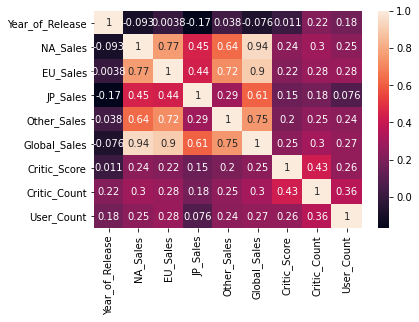

In [ ]:
# step 2: general data exploration 

#Heat Map: all numerical variables 
df4heatmaps = df
# Compute the correlation matrix 
corr = df4heatmaps.corr()

# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)



In [ ]:
#Box Plot: relationship between categorical variables and numerical variables

# define x_var, y_var, df4ssb 

# x_var = cvar_list
# y_var = nvar_list
# df4ssb = df

# Generate the side-by-side box plot. ax is the side-by-side boxplot object
# ax = df4ssb.boxplot(column=y_var, by=x_var)

# Set the label on the y-axis using set_ylabel method of the object ax
# ax.set_ylabel(y_var)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9359e5e9d8> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#Step 3: Missing Value Imputation

# Show the number of missing values for each variable in the data frame
print(df.isnull().sum())

#drop all the observations that contains missing values
df_sample1 = df.copy()
df_sample1 = df.dropna()
print(df_sample1.shape)
print(df_sample1.isnull().sum())


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
(6825, 16)
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [ ]:
#step 4: compare the sales with average to get pass or unpass 
df_sample2 =df_sample1.copy()

#find average for sales

avg_NA = df_sample1['NA_Sales'].sum()/len(df_sample1['NA_Sales'])
avg_EU = df_sample1['EU_Sales'].sum()/len(df_sample1['EU_Sales'])
avg_JP = df_sample1['JP_Sales'].sum()/len(df_sample1['JP_Sales'])
avg_OT = df_sample1['Other_Sales'].sum()/len(df_sample1['Other_Sales'])
avg_GL = df_sample1['Global_Sales'].sum()/len(df_sample1['Global_Sales'])

avg_area = [avg_NA, avg_EU, avg_JP, avg_OT, avg_GL]

result_NA =[]
for i in df_sample2['NA_Sales']:
  if i <= avg_NA:
    result_NA.append(0)
  else:
    result_NA.append(1)

result_EU =[]
for i in df_sample2['EU_Sales']:
  if i <= avg_EU:
    result_EU.append(0)
  else:
    result_EU.append(1)

result_JP =[]
for i in df_sample2['JP_Sales']:
  if i <= avg_JP:
    result_JP.append(0)
  else:
    result_JP.append(1)

result_OT =[]
for i in df_sample2['Other_Sales']:
  if i <= avg_OT:
    result_OT.append(0)
  else:
    result_OT.append(1)

result_GL =[]
for i in df_sample2['Global_Sales']:
  if i <= avg_GL:
    result_GL.append(0)
  else:
    result_GL.append(1)




In [ ]:
df_sample2['NA_Sales'] = result_NA
df_sample2['EU_Sales'] = result_EU
df_sample2['JP_Sales'] = result_JP
df_sample2['Other_Sales'] = result_OT
df_sample2['Global_Sales'] = result_GL


In [ ]:
#Step 5: Standardize the numerical variables 
df_sample3 = df_sample2.copy()
cvar_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Platform', 'Year_of_Release', 'Genre', 'Publisher','Developer','Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_sample3[nvar_list] = (df_sample2[nvar_list] - df_sample2[nvar_list].mean())/df_sample2[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample4 = df_sample3.copy()
df_sample4[cvar_list] = df_sample3[cvar_list].astype('category')
df_sample4[nvar_list] = df_sample3[nvar_list].astype('float64')

print(df_sample4)

                                    Name Platform  ...           Developer Rating
0                             Wii Sports      Wii  ...            Nintendo      E
2                         Mario Kart Wii      Wii  ...            Nintendo      E
3                      Wii Sports Resort      Wii  ...            Nintendo      E
6                  New Super Mario Bros.       DS  ...            Nintendo      E
7                               Wii Play      Wii  ...            Nintendo      E
...                                  ...      ...  ...                 ...    ...
16667         E.T. The Extra-Terrestrial      GBA  ...       Fluid Studios      E
16677     Mortal Kombat: Deadly Alliance      GBA  ...     Criterion Games      M
16696  Metal Gear Solid V: Ground Zeroes       PC  ...  Kojima Productions      M
16700                             Breach       PC  ...        Atomic Games      T
16706            STORM: Frontline Nation       PC  ...              SimBin   E10+

[6825 rows x 16

In [ ]:
#step 6: drop variable -- Name and Developer since it is irrelevant to our research question
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns = 'Name')
df_sample6 = df_sample5.drop(columns ='Developer')
print(df_sample6)

      Platform Year_of_Release     Genre  ... User_Score User_Count Rating
0          Wii          2006.0    Sports  ...          8   0.250716      E
2          Wii          2008.0    Racing  ...        8.3   0.909519      E
3          Wii          2009.0    Sports  ...          8   0.029412      E
6           DS          2006.0  Platform  ...        8.5   0.436270      E
7          Wii          2006.0      Misc  ...        6.6  -0.077835      E
...        ...             ...       ...  ...        ...        ...    ...
16667      GBA          2001.0    Action  ...        2.4  -0.261687      E
16677      GBA          2002.0  Fighting  ...        8.8  -0.282115      M
16696       PC          2014.0    Action  ...        7.6   0.403926      M
16700       PC          2011.0   Shooter  ...        5.8  -0.224236      T
16706       PC          2011.0  Strategy  ...        7.2  -0.275306   E10+

[6825 rows x 14 columns]


In [ ]:
#step 7: organize and concentrate some variables 
# catergory top 10
import numpy as np
df_sample7 =df_sample6.copy()
cat10 = (((df_sample7['Publisher'].value_counts())[11: ]).index).tolist()

df_sample7['Publisher'] = df_sample6['Publisher'].replace(cat10,'Others')


In [ ]:
# change relseased years
df_sample8=df_sample7.copy()
irryear = (((df_sample7['Year_of_Release'].value_counts())[17: ]).index).tolist()
df_sample8['Year_of_Release'] = df_sample6['Year_of_Release'].replace(irryear,'unknown')

In [ ]:
# round up user_score
df_sample9 = df_sample8.copy()
df_sample9['User_Score'] = df_sample9['User_Score'].astype('float64')
df_sample9['User_Score'] = df_sample9['User_Score'].apply(np.ceil)

df_sample9['User_Score'] = df_sample9['User_Score'].astype('category')
df_sample9['User_Score']

0        8.0
2        9.0
3        8.0
6        9.0
7        7.0
        ... 
16667    3.0
16677    9.0
16696    8.0
16700    6.0
16706    8.0
Name: User_Score, Length: 6825, dtype: category
Categories (10, float64): [1.0, 2.0, 3.0, 4.0, ..., 7.0, 8.0, 9.0, 10.0]

In [ ]:
# step 8: get dummy and drop rdummies
df_sample10 = df_sample9.copy()
df_sample10 = pd.get_dummies(df_sample9, prefix_sep='_')
print(df_sample10.columns.values)
print(df_sample10.shape)


['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS2' 'Platform_PS3' 'Platform_PS4' 'Platform_PSP'
 'Platform_PSV' 'Platform_Wii' 'Platform_WiiU' 'Platform_X360'
 'Platform_XB' 'Platform_XOne' 'Year_of_Release_unknown'
 'Year_of_Release_2000.0' 'Year_of_Release_2001.0'
 'Year_of_Release_2002.0' 'Year_of_Release_2003.0'
 'Year_of_Release_2004.0' 'Year_of_Release_2005.0'
 'Year_of_Release_2006.0' 'Year_of_Release_2007.0'
 'Year_of_Release_2008.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Action' 'Genre_Adventure'
 'Genre_Fighting' 'Genre_Misc' 'Genre_Platform' 'Genre_Puzzle'
 'Genre_Racing' 'Genre_Role-Playing' 'Genre_Shooter' 'Genre_Simulation'
 'Genre_Sports' 'Genre_Strategy' 'Publisher_Activision' 'Publisher_Other

In [ ]:
#step 10: build models and select based on their AUC
df.mode()

Name Platform  ...  Developer Rating
0  Need for Speed: Most Wanted      PS2  ...    Ubisoft      E

[1 rows x 16 columns]

In [ ]:
rdummies = ['Platform_PS2', 'Year_of_Release_2008.0', 'Genre_Action', 'Publisher_Electronic Arts', 'NA_Sales_0', 'EU_Sales_0', 'JP_Sales_0', 'Other_Sales_0', 'Global_Sales_0', 'User_Score_10.0', 'Rating_E']
#NA_Sales LogisticRegression

df_LGsample1 = df_sample10.copy()

df_LGsample1 = df_sample10.drop(columns=rdummies)

print(df_LGsample1.columns.values)
print(df_LGsample1.shape)


['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_XOne' 'Year_of_Release_unknown' 'Year_of_Release_2000.0'
 'Year_of_Release_2001.0' 'Year_of_Release_2002.0'
 'Year_of_Release_2003.0' 'Year_of_Release_2004.0'
 'Year_of_Release_2005.0' 'Year_of_Release_2006.0'
 'Year_of_Release_2007.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Others' 'Publisher_Capcom'
 'Publisher_Konami Digital Enterta

In [ ]:
#Data Partiton
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
r_list = ['EU_Sales_1', 'JP_Sales_1', 'Other_Sales_1', 'Global_Sales_1']
df_LGsample2 = df_LGsample1.drop(columns = r_list)
df4partition = df_LGsample2.copy()
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Critic_Score  Critic_Count  User_Count  ...  Rating_M  Rating_RP  Rating_T
9282      -0.380146     -0.568614   -0.288924  ...         0          0         1
14910      0.124592     -1.088793   -0.285520  ...         0          0         0
10534     -0.163830      0.263671   -0.275306  ...         1          0         0
123        0.268803      0.835868   -0.251473  ...         0          0         0
2837       0.629330      0.107618   -0.239557  ...         0          0         0
...             ...           ...         ...  ...       ...        ...       ...
1414       1.134069      1.980261   -0.059109  ...         0          0         1
10316      0.413014     -0.880721    0.364772  ...         1          0         0
7306      -0.524357     -0.620632   -0.285520  ...         0          0         1
346        0.845647      0.679814   -0.157844  ...         1          0         0
10190     -0.019619     -1.140811   -0.287222  ...         0          0         0

[5460 rows x 74

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

DV = 'NA_Sales_1'

y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])


In [ ]:
kfolds = 5

min_alpha = 0.001
max_alpha = 100

max_C = 1/min_alpha
min_C = 1/max_alpha

n_candidates = 1000

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

C_list = list(np.linspace(min_C, max_C, num=n_candidates))

clf_optimal_NA = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=2000, random_state=1, n_jobs=-1).fit(X,y)
clf_na = 1/clf_optimal.C_
print(clf_na)

y_test = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

y_test_predicted = clf_optimal.predict(X_test)

from sklearn import metrics
aug_lg_na = metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1])
print(aug_lg_na)


[0.0989903]
0.7917435811377749


In [ ]:
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1,n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

print(summary_coef(clf_optimal_NA))

                     0
Critic_Score  0.873559
Critic_Count  0.734859
User_Count    0.556910
Platform_3DS -0.600547
Platform_DC  -0.132653
...                ...
Rating_K-A    0.000000
Rating_M     -0.327154
Rating_RP     0.000000
Rating_T     -0.471871
Intercept     0.498822

[74 rows x 1 columns]


Do NOT run the folling code cell before comparing the models AUC. Make sure df_newdata_sample_5 is ready before running the following one. When runing it for the second time, make sure to run at least the above four code cells 

In [ ]:
Predicted_NA_Sales = clf_optimal_NA.predict_proba(df_newdata_sample5)[:,1]
print(Predicted_NA_Sales)

[0.99982497 0.00168317 0.21503834 0.13639502 0.96975521 0.81186855
 0.9498404  0.46629391 0.30024994 0.94252808 0.77176663 0.33697786
 0.64697741 0.96014845 0.88648984 0.72848349 0.95845707 0.88320616
 0.19670354 0.66852915 0.99993833 0.82662148 0.37132363 0.92865189]


In [ ]:
#Data Partiton
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
r_list = ['NA_Sales_1', 'JP_Sales_1', 'Other_Sales_1', 'Global_Sales_1']
df_LGsample3 = df_LGsample1.drop(columns = r_list)
df4partition = df_LGsample3.copy()
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

DV = 'EU_Sales_1'

y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

kfolds = 5

min_alpha = 0.001
max_alpha = 1000

max_C = 1/min_alpha
min_C = 1/max_alpha

n_candidates = 100

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

C_list = list(np.linspace(min_C, max_C, num=n_candidates))

clf_optimal_EU = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=2000, random_state=1, n_jobs=-1).fit(X,y)
clf_eu = 1/clf_optimal.C_
print(clf_eu)

y_test = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

y_test_predicted = clf_optimal.predict(X_test)

from sklearn import metrics
auc_lg_eu = metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1])
print(auc_lg_eu)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[0.0989903]
0.8249385151094553


In [ ]:
print(summary_coef(clf_optimal_EU))

                     0
Critic_Score  0.749099
Critic_Count  0.789788
User_Count    1.232271
Platform_3DS -0.405293
Platform_DC  -1.144068
...                ...
Rating_K-A   -2.362119
Rating_M     -0.732922
Rating_RP     0.000000
Rating_T     -0.589919
Intercept     0.144588

[74 rows x 1 columns]


Do NOT run the following code cell before comparing the models AUC. When runing it for the second time, make sure to run at least the above code cell

In [ ]:
Predicted_EU_Sales = clf_optimal_EU.predict_proba(df_newdata_sample5)[:,1]
print(Predicted_EU_Sales)

[0.99999991 0.0047056  0.06308147 0.1955109  0.85802009 0.70583656
 0.90597455 0.25343488 0.79227705 0.9573312  0.48401541 0.15321698
 0.59495092 0.99985535 0.98170365 0.63987421 0.99931811 0.8422205
 0.11823032 0.79634597 1.         0.66317283 0.16256333 0.99902117]


In [ ]:
#Data Partiton
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
r_list = ['NA_Sales_1', 'EU_Sales_1', 'Other_Sales_1', 'Global_Sales_1']
df_LGsample4 = df_LGsample1.drop(columns = r_list)
df4partition = df_LGsample4.copy()
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

DV = 'JP_Sales_1'

y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

kfolds = 5

min_alpha = 0.001
max_alpha = 1000

max_C = 1/min_alpha
min_C = 1/max_alpha

n_candidates = 1000

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

C_list = list(np.linspace(min_C, max_C, num=n_candidates))

clf_optimal_JP = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=2000, random_state=1, n_jobs=-1).fit(X,y)
clf_jp = 1/clf_optimal.C_
print(clf_jp)

y_test = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

y_test_predicted = clf_optimal.predict(X_test)

from sklearn import metrics
auc_lg_jp = metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1])
print(auc_lg_jp)



[0.0989903]
0.6572554599256297


In [ ]:
print(summary_coef(clf_optimal_JP))

                     0
Critic_Score  0.478446
Critic_Count  0.545681
User_Count    0.440571
Platform_3DS  0.352305
Platform_DC   0.638301
...                ...
Rating_K-A    0.000000
Rating_M      0.159303
Rating_RP     0.000000
Rating_T      0.000000
Intercept    -2.580161

[74 rows x 1 columns]


Do NOT run the following code cell before comparing the models AUC. When runing it for the second time, make sure to run at least the above code cell

In [ ]:
Predicted_JP_Sales = clf_optimal_JP.predict_proba(df_newdata_sample5)[:,1]
print(Predicted_JP_Sales)

[9.85783925e-01 5.02169593e-05 1.71959920e-03 9.12133282e-01
 9.99579980e-01 9.88743607e-01 9.60229731e-01 5.77206295e-01
 1.09891447e-02 9.82481792e-01 9.74329821e-01 9.57265957e-01
 9.59013358e-01 9.29181338e-01 8.61379617e-01 8.99236071e-01
 5.44773991e-01 1.99315037e-01 5.63162147e-02 9.56302253e-02
 7.86051626e-01 4.65210590e-01 2.09998496e-01 4.17161074e-01]


In [ ]:
#Data Partiton
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
r_list = ['NA_Sales_1', 'EU_Sales_1', 'JP_Sales_1', 'Other_Sales_1']
df_LGsample6 = df_LGsample1.drop(columns = r_list)
df4partition = df_LGsample6.copy()
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

DV = 'Global_Sales_1'

y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

kfolds = 5

min_alpha = 0.001
max_alpha = 100

max_C = 1/min_alpha
min_C = 1/max_alpha

n_candidates = 1000

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

C_list = list(np.linspace(min_C, max_C, num=n_candidates))

clf_optimal_GL = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=2000, random_state=1, n_jobs=-1).fit(X,y)
clf_gl = 1/clf_optimal.C_
print(clf_gl)

y_test = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

y_test_predicted = clf_optimal.predict(X_test)

from sklearn import metrics
auc_lg_gl = metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1])
print(auc_lg_gl)



[0.0989903]
0.8356104633304254


In [ ]:
print(summary_coef(clf_optimal_GL))

                     0
Critic_Score  0.918615
Critic_Count  0.830385
User_Count    0.521788
Platform_3DS -1.180174
Platform_DC  -1.308250
...                ...
Rating_K-A    0.000000
Rating_M     -0.597586
Rating_RP     0.000000
Rating_T     -0.582305
Intercept     0.909124

[74 rows x 1 columns]


Do NOT run the following code cell before comparing the models AUC. When runing it for the second time, make sure to run at least the above code cell

In [ ]:
Predicted_GL_Sales = clf_optimal_GL.predict_proba(df_newdata_sample5)[:,1]
print(Predicted_GL_Sales)

[0.99986733 0.0053829  0.24084398 0.13103792 0.97910456 0.91400806
 0.93273418 0.41626543 0.59679226 0.97501288 0.87619897 0.47258292
 0.85858658 0.98393865 0.87320258 0.78429271 0.94543477 0.88443023
 0.26131868 0.89301592 0.99984916 0.79663399 0.66437999 0.91106429]


In [ ]:
#Classification Tree
df_CTsample = df_sample2.copy()
cvar_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Platform', 'Year_of_Release', 'Genre', 'Publisher','Developer','Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_CTsample[cvar_list] = df_sample2[cvar_list].astype('category')
df_CTsample[nvar_list] = df_sample2[nvar_list].astype('float64')

In [ ]:
df_CTsample1 = df_CTsample.drop(columns = 'Name'
)

df_CTsample2 = df_CTsample1.drop(columns ='Developer')

df_CTsample3 =df_CTsample2.copy()
cat10 = (((df_CTsample2['Publisher'].value_counts())[11: ]).index).tolist()
df_CTsample3['Publisher'] = df_CTsample2['Publisher'].replace(cat10,'Others')

df_CTsample4=df_CTsample3.copy()
irryear = (((df_CTsample3['Year_of_Release'].value_counts())[17: ]).index).tolist()
df_CTsample4['Year_of_Release'] = df_CTsample3['Year_of_Release'].replace(irryear,'before2020')

df_CTsample5 = df_CTsample4.copy()
df_CTsample5['User_Score'] = df_CTsample5['User_Score'].astype('float64')
df_CTsample5['User_Score'] = df_CTsample5['User_Score'].apply(np.ceil)

df_CTsample5['User_Score'] = df_CTsample5['User_Score'].astype('category')

In [ ]:
#NA_Sales CT

cvar_list = ['NA_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']

df_NAsample = df_CTsample5.copy()
df_NAsample[cvar_list] = df_CTsample5[cvar_list].astype('category')
df_NAsample[nvar_list] = df_CTsample5[nvar_list].astype('float64')
df_NAsample2 = df_NAsample.copy()
df_NAsample2 = pd.get_dummies(df_NAsample, prefix_sep='_')

print(df_NAsample[cvar_list].mode().loc[0:])

  NA_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['NA_Sales_0', 'Platform_PS2', 'Year_of_Release_2008.0', 'Genre_Action', 'Publisher_Others', 'Rating_T','User_Score_8.0']
df_NAsample3 = df_NAsample2.copy()
df_NAsample3 = df_NAsample2.drop(columns=rdummies)

other_area_sales=['EU_Sales_0','EU_Sales_1','JP_Sales_0','JP_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_NAsample4 = df_NAsample3.copy()
df_NAsample4 = df_NAsample3.drop(columns=other_area_sales)
print(df_NAsample4.columns.values)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_XOne' 'Year_of_Release_before2020' 'Year_of_Release_2000.0'
 'Year_of_Release_2001.0' 'Year_of_Release_2002.0'
 'Year_of_Release_2003.0' 'Year_of_Release_2004.0'
 'Year_of_Release_2005.0' 'Year_of_Release_2006.0'
 'Year_of_Release_2007.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Capcom' 'Publisher_Electronic Arts'
 'Publisher_Konami Dig

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_NAsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

from sklearn.tree import DecisionTreeClassifier

DV = 'NA_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

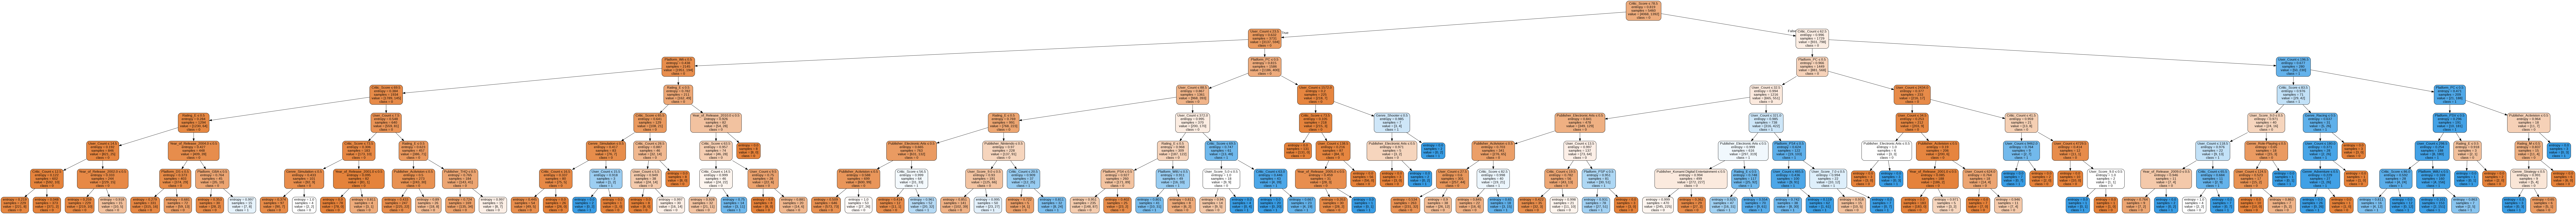

In [ ]:
kfolds = 5

maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

def profit_calculation(model, x_value, y_value):
  
  d_cutoff = 1/11

  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
 
  y = list(y_value)
  
  n_obs = len(y)

  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())
cdep_na = clf_BPT.get_depth()
# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
auc_ct_na = roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1])
print(auc_ct_na)

7
0.8095038317391061


In [ ]:
import numpy as np

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['Critic_Score <= 78.5', 'User_Count <= 23.5', 'Platform_Wii <= 0.5', 'Critic_Score <= 69.5', 'Rating_AO <= 0.5', 'User_Count <= 14.5', 'Critic_Count <= 12.5']
sample = 229
value = [221, 8]
class =  0

Leaf node ID = 2
Path = ['Critic_Score <= 78.5', 'User_Count <= 23.5', 'Platform_Wii <= 0.5', 'Critic_Score <= 69.5', 'Rating_AO <= 0.5', 'User_Count <= 14.5', 'Critic_Count > 12.5']
sample = 373
value = [371, 2]
class =  0

Leaf node ID = 3
Path = ['Critic_Score <= 78.5', 'User_Count <= 23.5', 'Platform_Wii <= 0.5', 'Critic_Score <= 69.5', 'Rating_AO <= 0.5', 'User_Count > 14.5', 'Year_of_Release_2002.0 <= 0.5']
sample = 229
value = [219, 10]
class =  0

Leaf node ID = 4
Path = ['Critic_Score <= 78.5', 'User_Count <= 23.5', 'Platform_Wii <= 0.5', 'Critic_Score <= 69.5', 'Rating_AO <= 0.5', 'User_Count > 14.5', 'Year_of_Release_2002.0 > 0.5']
sample = 15
value = [10, 5]
class =  0

Leaf node ID = 5
Path = ['Critic_Score <= 78.5', 'User_Count <= 23.5', 'Platform_W

In [ ]:
#EU_Sales CT

cvar_list = ['EU_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']

df_EUsample = df_CTsample5.copy()
df_EUsample[cvar_list] = df_CTsample5[cvar_list].astype('category')
df_EUsample[nvar_list] = df_CTsample5[nvar_list].astype('float64')
df_EUsample2 = df_EUsample.copy()
df_EUsample2 = pd.get_dummies(df_EUsample, prefix_sep='_')

print(df_EUsample[cvar_list].mode().loc[0:])

  EU_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['EU_Sales_0', 'Platform_PS2', 'Year_of_Release_2008.0', 'Genre_Action', 'Publisher_Others', 'Rating_T','User_Score_8.0']
df_EUsample3 = df_EUsample2.copy()
df_EUsample3 = df_EUsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','JP_Sales_0','JP_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_EUsample4 = df_EUsample3.copy()
df_EUsample4 = df_EUsample3.drop(columns=other_area_sales)
print(df_EUsample4.columns.values)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_XOne' 'Year_of_Release_before2020' 'Year_of_Release_2000.0'
 'Year_of_Release_2001.0' 'Year_of_Release_2002.0'
 'Year_of_Release_2003.0' 'Year_of_Release_2004.0'
 'Year_of_Release_2005.0' 'Year_of_Release_2006.0'
 'Year_of_Release_2007.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Capcom' 'Publisher_Electronic Arts'
 'Publisher_Konami Dig

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_EUsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

DV = 'EU_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

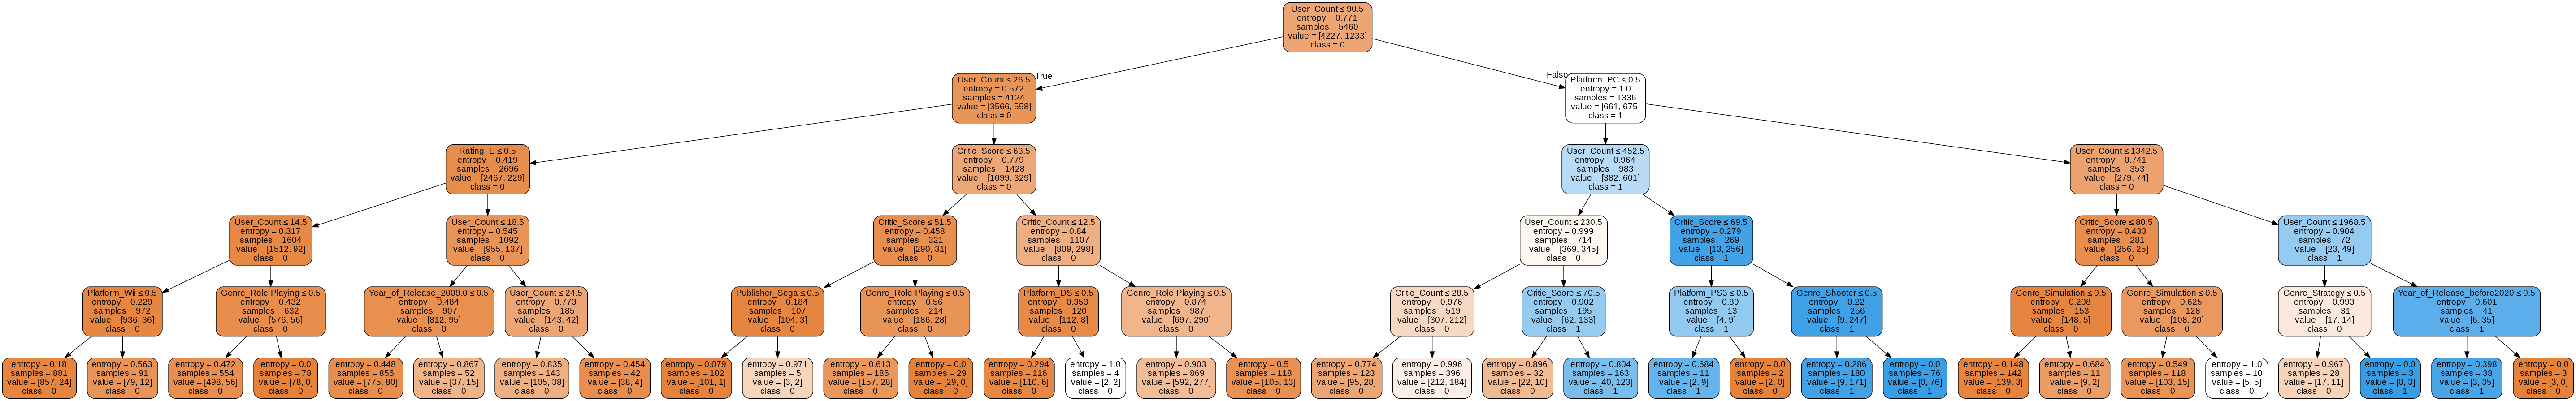

In [ ]:
kfolds = 5

maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

def profit_calculation(model, x_value, y_value):
  
  d_cutoff = 1/11

  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)

  y = list(y_value)

  n_obs = len(y)

  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())
cdep_eu = clf_BPT.get_depth()
# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
auc_ct_eu = roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1])
print(auc_ct_eu)

5
0.7833540312172791


In [ ]:
import numpy as np

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO <= 0.5', 'User_Count <= 14.5', 'Platform_Wii <= 0.5']
sample = 881
value = [857, 24]
class =  0

Leaf node ID = 2
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO <= 0.5', 'User_Count <= 14.5', 'Platform_Wii > 0.5']
sample = 91
value = [79, 12]
class =  0

Leaf node ID = 3
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO <= 0.5', 'User_Count > 14.5', 'Genre_Role-Playing <= 0.5']
sample = 554
value = [498, 56]
class =  0

Leaf node ID = 4
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO <= 0.5', 'User_Count > 14.5', 'Genre_Role-Playing > 0.5']
sample = 78
value = [78, 0]
class =  0

Leaf node ID = 5
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO > 0.5', 'User_Count <= 18.5', 'Year_of_Release_2009.0 <= 0.5']
sample = 855
value = [775, 80]
class =  0

Leaf node ID = 6
Path = ['User_Count <= 90.5', 'User_Count <= 26.5', 'Rating_AO > 0.5', 'User_Count <=

In [ ]:
#JP_Sales CT

cvar_list = ['JP_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']

df_JPsample = df_CTsample5.copy()
df_JPsample[cvar_list] = df_CTsample5[cvar_list].astype('category')
df_JPsample[nvar_list] = df_CTsample5[nvar_list].astype('float64')
df_JPsample2 = df_JPsample.copy()
df_JPsample2 = pd.get_dummies(df_JPsample, prefix_sep='_')

print(df_JPsample[cvar_list].mode().loc[0:])

  JP_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['JP_Sales_0', 'Platform_PS2', 'Year_of_Release_2008.0', 'Genre_Action', 'Publisher_Others', 'Rating_T','User_Score_8.0']
df_JPsample3 = df_JPsample2.copy()
df_JPsample3 = df_JPsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','EU_Sales_0','EU_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_JPsample4 = df_JPsample3.copy()
df_JPsample4 = df_JPsample3.drop(columns=other_area_sales)
print(df_JPsample4.columns.values)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_XOne' 'Year_of_Release_before2020' 'Year_of_Release_2000.0'
 'Year_of_Release_2001.0' 'Year_of_Release_2002.0'
 'Year_of_Release_2003.0' 'Year_of_Release_2004.0'
 'Year_of_Release_2005.0' 'Year_of_Release_2006.0'
 'Year_of_Release_2007.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Capcom' 'Publisher_Electronic Arts'
 'Publisher_Konami Dig

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_JPsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

DV = 'JP_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

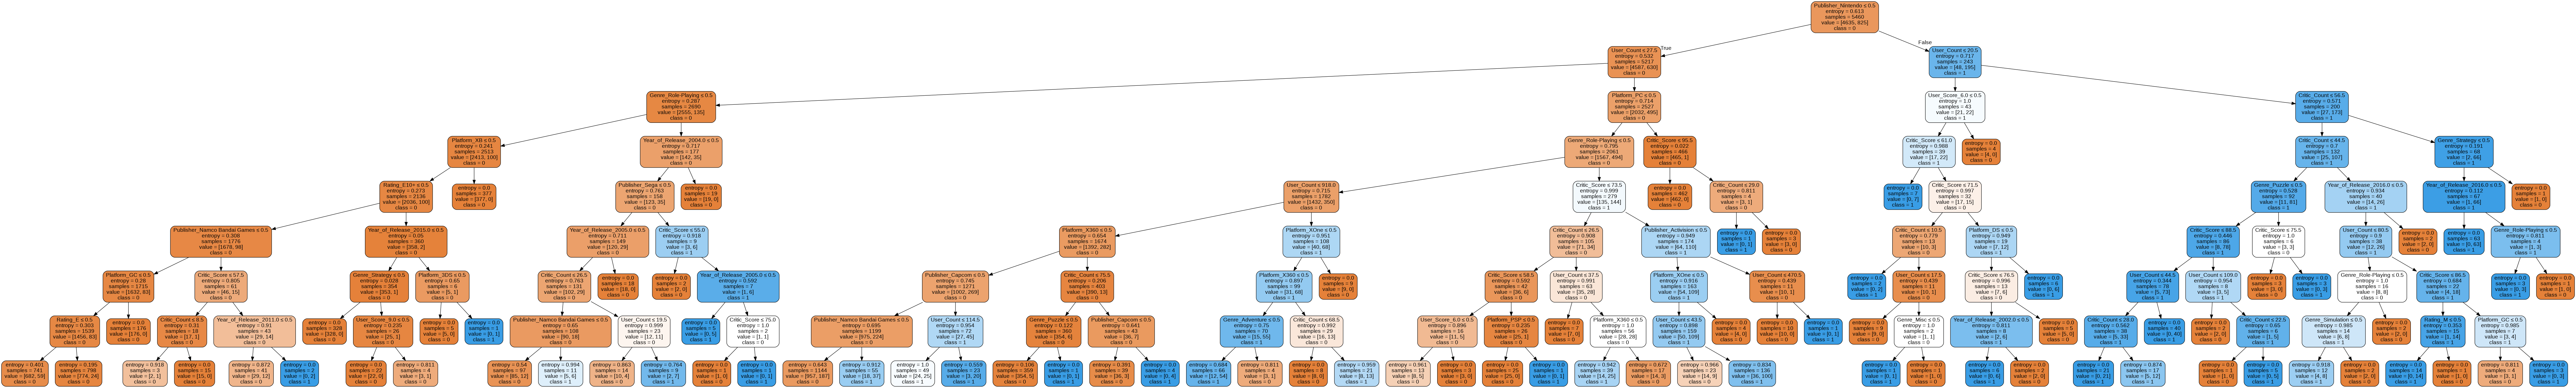

In [ ]:
kfolds = 5

maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

def profit_calculation(model, x_value, y_value):

  d_cutoff = 1/11

  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)

  y = list(y_value)
  
  n_obs = len(y)

  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())
cdep_jp = clf_BPT.get_depth()
# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
auc_ct_jp = roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1])
print(auc_ct_jp)

8
0.8243854855885896


In [ ]:
import numpy as np

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['Publisher_Nintendo <= 0.5', 'User_Count <= 27.5', 'Genre_Role-Playing <= 0.5', 'Platform_XB <= 0.5', 'Rating_E <= 0.5', 'Publisher_Namco Bandai Games <= 0.5', 'Platform_GC <= 0.5', 'Rating_AO <= 0.5']
sample = 741
value = [682, 59]
class =  0

Leaf node ID = 2
Path = ['Publisher_Nintendo <= 0.5', 'User_Count <= 27.5', 'Genre_Role-Playing <= 0.5', 'Platform_XB <= 0.5', 'Rating_E <= 0.5', 'Publisher_Namco Bandai Games <= 0.5', 'Platform_GC <= 0.5', 'Rating_AO > 0.5']
sample = 798
value = [774, 24]
class =  0

Leaf node ID = 3
Path = ['Publisher_Nintendo <= 0.5', 'User_Count <= 27.5', 'Genre_Role-Playing <= 0.5', 'Platform_XB <= 0.5', 'Rating_E <= 0.5', 'Publisher_Namco Bandai Games <= 0.5', 'Platform_GC > 0.5']
sample = 176
value = [176, 0]
class =  0

Leaf node ID = 4
Path = ['Publisher_Nintendo <= 0.5', 'User_Count <= 27.5', 'Genre_Role-Playing <= 0.5', 'Platform_XB <= 0.5', 'Rating_E <= 0.5', 'Publisher_Namco Bandai Games > 0.5', 'Critic_Score <= 57.5', 'Cri

In [ ]:
#Global_Sales CT

cvar_list = ['Global_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']

df_Gsample = df_CTsample5.copy()
df_Gsample[cvar_list] = df_CTsample5[cvar_list].astype('category')
df_Gsample[nvar_list] = df_CTsample5[nvar_list].astype('float64')
df_Gsample2 = df_Gsample.copy()
df_Gsample2 = pd.get_dummies(df_Gsample, prefix_sep='_')

print(df_Gsample[cvar_list].mode().loc[0:])

  Global_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0            0      PS2            2008  Action    Others      T        8.0


In [ ]:

rdummies = ['Global_Sales_0', 'Platform_PS2', 'Year_of_Release_2008.0', 'Genre_Action', 'Publisher_Others', 'Rating_T','User_Score_8.0']
df_Gsample3 = df_Gsample2.copy()
df_Gsample3 = df_Gsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','JP_Sales_0','JP_Sales_1','Other_Sales_0', 'Other_Sales_1','EU_Sales_0','EU_Sales_1' ]
df_Gsample4 = df_Gsample3.copy()
df_Gsample4 = df_Gsample3.drop(columns=other_area_sales)
print(df_Gsample4.columns.values)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_XOne' 'Year_of_Release_before2020' 'Year_of_Release_2000.0'
 'Year_of_Release_2001.0' 'Year_of_Release_2002.0'
 'Year_of_Release_2003.0' 'Year_of_Release_2004.0'
 'Year_of_Release_2005.0' 'Year_of_Release_2006.0'
 'Year_of_Release_2007.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Capcom' 'Publisher_Electronic Arts'
 'Publisher_Konami Dig

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_Gsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

DV = 'Global_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

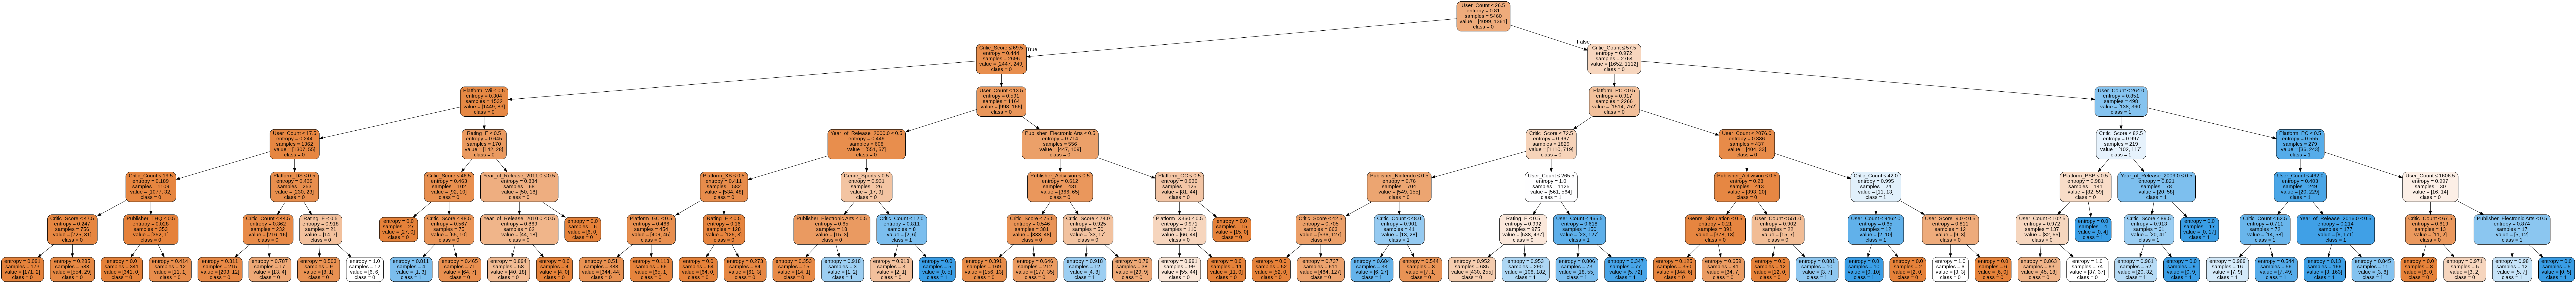

In [ ]:
kfolds = 5

maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

def profit_calculation(model, x_value, y_value):

  d_cutoff = 1/11

  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)

  y = list(y_value)
  
  n_obs = len(y)

  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())
cdep_gl = clf_BPT.get_depth()
# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
auc_ct_gl = roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1])
print(auc_ct_gl)

6
0.8273876076619691


In [ ]:
import numpy as np

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['User_Count <= 26.5', 'Critic_Score <= 69.5', 'Platform_Wii <= 0.5', 'User_Count <= 17.5', 'Critic_Count <= 19.5', 'Critic_Score <= 47.5']
sample = 173
value = [171, 2]
class =  0

Leaf node ID = 2
Path = ['User_Count <= 26.5', 'Critic_Score <= 69.5', 'Platform_Wii <= 0.5', 'User_Count <= 17.5', 'Critic_Count <= 19.5', 'Critic_Score > 47.5']
sample = 583
value = [554, 29]
class =  0

Leaf node ID = 3
Path = ['User_Count <= 26.5', 'Critic_Score <= 69.5', 'Platform_Wii <= 0.5', 'User_Count <= 17.5', 'Critic_Count > 19.5', 'Publisher_THQ <= 0.5']
sample = 341
value = [341, 0]
class =  0

Leaf node ID = 4
Path = ['User_Count <= 26.5', 'Critic_Score <= 69.5', 'Platform_Wii <= 0.5', 'User_Count <= 17.5', 'Critic_Count > 19.5', 'Publisher_THQ > 0.5']
sample = 12
value = [11, 1]
class =  0

Leaf node ID = 5
Path = ['User_Count <= 26.5', 'Critic_Score <= 69.5', 'Platform_Wii <= 0.5', 'User_Count > 17.5', 'Platform_DS <= 0.5', 'Critic_Count <= 44.5']
sample = 215
value 

In [ ]:
#Nearest Neighbor
df_kNNsample = df_sample2.copy()
cvar_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Platform', 'Year_of_Release', 'Genre', 'Publisher','Developer','Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_kNNsample[nvar_list] = (df_sample2[nvar_list] - df_sample2[nvar_list].mean())/df_sample2[nvar_list].std()
df_kNNsample[cvar_list] = df_sample2[cvar_list].astype('category')
df_kNNsample[nvar_list] = df_sample2[nvar_list].astype('float64')

In [ ]:
df_kNNsample1 = df_kNNsample.drop(columns = 'Name')
df_kNNsample2 = df_kNNsample1.drop(columns ='Developer')

df_kNNsample3 =df_kNNsample2.copy()
cat10 = (((df_kNNsample2['Publisher'].value_counts())[11: ]).index).tolist()
df_kNNsample3['Publisher'] = df_kNNsample2['Publisher'].replace(cat10,'Others')

df_kNNsample4=df_kNNsample3.copy()
irryear = (((df_kNNsample3['Year_of_Release'].value_counts())[17: ]).index).tolist()
df_kNNsample4['Year_of_Release'] = df_kNNsample3['Year_of_Release'].replace(irryear,'before2020')

df_kNNsample5 = df_kNNsample4.copy()
df_kNNsample5['User_Score'] = df_kNNsample5['User_Score'].astype('float64')
df_kNNsample5['User_Score'] = df_kNNsample5['User_Score'].apply(np.ceil)

df_kNNsample5['User_Score'] = df_kNNsample5['User_Score'].astype('category')

In [ ]:
#Variable Transformation #
#NA_Sales kNN
cvar_list = ['NA_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_KNAsample = df_kNNsample5.copy()
df_KNAsample[nvar_list] = (df_kNNsample5[nvar_list] - df_kNNsample5[nvar_list].mean())/df_kNNsample5[nvar_list].std()

df_KNAsample[cvar_list] = df_kNNsample5[cvar_list].astype('category')
df_KNAsample[nvar_list] = df_kNNsample5[nvar_list].astype('float64')
df_KNAsample2 = df_KNAsample.copy()
df_KNAsample2 = pd.get_dummies(df_KNAsample, prefix_sep='_')

print(df_KNAsample[cvar_list].mode().loc[0:])

  NA_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['NA_Sales_0']
df_KNAsample3 = df_KNAsample2.copy()
df_KNAsample3 = df_KNAsample2.drop(columns=rdummies)

other_area_sales=['EU_Sales_0','EU_Sales_1','JP_Sales_0','JP_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_KNAsample4 = df_KNAsample3.copy()
df_KNAsample4 = df_KNAsample3.drop(columns=other_area_sales)
print(df_KNAsample4.columns.values)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS2' 'Platform_PS3' 'Platform_PS4' 'Platform_PSP'
 'Platform_PSV' 'Platform_Wii' 'Platform_WiiU' 'Platform_X360'
 'Platform_XB' 'Platform_XOne' 'Year_of_Release_before2020'
 'Year_of_Release_2000.0' 'Year_of_Release_2001.0'
 'Year_of_Release_2002.0' 'Year_of_Release_2003.0'
 'Year_of_Release_2004.0' 'Year_of_Release_2005.0'
 'Year_of_Release_2006.0' 'Year_of_Release_2007.0'
 'Year_of_Release_2008.0' 'Year_of_Release_2009.0'
 'Year_of_Release_2010.0' 'Year_of_Release_2011.0'
 'Year_of_Release_2012.0' 'Year_of_Release_2013.0'
 'Year_of_Release_2014.0' 'Year_of_Release_2015.0'
 'Year_of_Release_2016.0' 'Genre_Action' 'Genre_Adventure'
 'Genre_Fighting' 'Genre_Misc' 'Genre_Platform' 'Genre_Puzzle'
 'Genre_Racing' 'Genre_Role-Playing' 'Genre_Shooter' 'Genre_Simulation'
 'Genre_Sports' 'Genre_Strategy' 'Publisher_Activision' 'Publisher_Ot

In [ ]:
#Data Partiton
from sklearn.model_selection import train_test_split

df4partition = df_KNAsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Critic_Score  Critic_Count  User_Count  ...  Rating_M  Rating_RP  Rating_T
9282           65.0          18.0         5.0  ...         0          0         1
14910          72.0           8.0         7.0  ...         0          0         0
10534          68.0          34.0        13.0  ...         1          0         0
123            74.0          45.0        27.0  ...         0          0         0
2837           79.0          31.0        34.0  ...         0          0         0
...             ...           ...         ...  ...       ...        ...       ...
1414           86.0          67.0       140.0  ...         0          0         1
10316          76.0          12.0       389.0  ...         1          0         0
7306           63.0          17.0         7.0  ...         0          0         1
346            82.0          42.0        82.0  ...         1          0         0
10190          70.0           7.0         6.0  ...         0          0         0

[5460 rows x 80

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Placeholder variable: DV
DV = 'NA_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# First we build a kNN model with pre-specified k
k = 5

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

X_test = df_testData.drop(columns=DV)
y_test = df_testData[DV]


from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model with k=5
print(metrics.roc_auc_score(y_test, model_object.predict_proba(X_test)[:, 1]))

0.7032655242925423


In [ ]:
# Run Nearest neighbor with k-fold cross validation
# Placeholder variable: kfolds
kfolds = 5
max_k = 50
param_grid = {'n_neighbors': list(range(1, max_k+1))}

# using the probability prediction model carried by the model object model.
def profit_calculation(model, x_value, y_value):
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  y = list(y_value)
  n_obs = len(y)
  cum_profit = 0

  for i in range(n_obs): 
    if decision[i] == True and y[i] == 1: 
      profit = 10 
    elif decision[i] == True and y[i] == 0: 
      profit = -1 
    else:
      profit = 0 
    cum_profit = cum_profit + profit 
  
  average_net_profit = cum_profit / n_obs 
  return average_net_profit 

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_bestkNN = gridsearch.best_estimator_

In [ ]:
# Display the optimal k (k-th nearest neighbor)
print(clf_bestkNN.n_neighbors)
clf_knn_na = clf_bestkNN.n_neighbors
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the final selected k-NN model
from sklearn.metrics import roc_auc_score
auc_knn_na = roc_auc_score(y_test_actual, clf_bestkNN.predict_proba(X_test)[:,1])
print(auc_knn_na)

43
0.74237692130795


In [ ]:
#Variable Transformation #
#EU_Sales kNN
cvar_list = ['EU_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_KEUsample = df_kNNsample5.copy()
df_KEUsample[nvar_list] = (df_kNNsample5[nvar_list] - df_kNNsample5[nvar_list].mean())/df_kNNsample5[nvar_list].std()

df_KEUsample[cvar_list] = df_kNNsample5[cvar_list].astype('category')
df_KEUsample[nvar_list] = df_kNNsample5[nvar_list].astype('float64')
df_KEUsample2 = df_KEUsample.copy()
df_KEUsample2 = pd.get_dummies(df_KEUsample, prefix_sep='_')

print(df_KEUsample[cvar_list].mode().loc[0:])

  EU_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['EU_Sales_0']
df_KEUsample3 = df_KEUsample2.copy()
df_KEUsample3 = df_KEUsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','JP_Sales_0','JP_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_KEUsample4 = df_KEUsample3.copy()
df_KEUsample4 = df_KEUsample3.drop(columns=other_area_sales)

#Data Partiton
from sklearn.model_selection import train_test_split

df4partition = df_KEUsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Critic_Score  Critic_Count  User_Count  ...  Rating_M  Rating_RP  Rating_T
9282           65.0          18.0         5.0  ...         0          0         1
14910          72.0           8.0         7.0  ...         0          0         0
10534          68.0          34.0        13.0  ...         1          0         0
123            74.0          45.0        27.0  ...         0          0         0
2837           79.0          31.0        34.0  ...         0          0         0
...             ...           ...         ...  ...       ...        ...       ...
1414           86.0          67.0       140.0  ...         0          0         1
10316          76.0          12.0       389.0  ...         1          0         0
7306           63.0          17.0         7.0  ...         0          0         1
346            82.0          42.0        82.0  ...         1          0         0
10190          70.0           7.0         6.0  ...         0          0         0

[5460 rows x 80

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Placeholder variable: DV
DV = 'EU_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# First we build a kNN model with pre-specified k
k = 5

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

X_test = df_testData.drop(columns=DV)
y_test = df_testData[DV]

from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model with k=5
print(metrics.roc_auc_score(y_test, model_object.predict_proba(X_test)[:, 1]))

0.6917750261767355


In [ ]:
# Run Nearest neighbor with k-fold cross validation
# Placeholder variable: kfolds
kfolds = 5
max_k = 100
param_grid = {'n_neighbors': list(range(1, max_k+1))}

# using the probability prediction model carried by the model object model.
def profit_calculation(model, x_value, y_value):
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  y = list(y_value)
  n_obs = len(y)
  cum_profit = 0

  for i in range(n_obs): 
    if decision[i] == True and y[i] == 1: 
      profit = 10 
    elif decision[i] == True and y[i] == 0: 
      profit = -1 
    else:
      profit = 0 
    cum_profit = cum_profit + profit 
  
  average_net_profit = cum_profit / n_obs 
  return average_net_profit 

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_bestkNN = gridsearch.best_estimator_

# Display the optimal k (k-th nearest neighbor)
print(clf_bestkNN.n_neighbors)
clf_knn_eu = clf_bestkNN.n_neighbors
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the final selected k-NN model
from sklearn.metrics import roc_auc_score
auc_knn_eu = roc_auc_score(y_test_actual, clf_bestkNN.predict_proba(X_test)[:,1])
print(auc_knn_eu)

80
0.7556706114398423


In [ ]:
#Variable Transformation #
#JP_Sales kNN
cvar_list = ['JP_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_KJPsample = df_kNNsample5.copy()
df_KJPsample[nvar_list] = (df_kNNsample5[nvar_list] - df_kNNsample5[nvar_list].mean())/df_kNNsample5[nvar_list].std()

df_KJPsample[cvar_list] = df_kNNsample5[cvar_list].astype('category')
df_KJPsample[nvar_list] = df_kNNsample5[nvar_list].astype('float64')
df_KJPsample2 = df_KJPsample.copy()
df_KJPsample2 = pd.get_dummies(df_KJPsample, prefix_sep='_')

print(df_KJPsample[cvar_list].mode().loc[0:])

  JP_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0        0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['JP_Sales_0']
df_KJPsample3 = df_KJPsample2.copy()
df_KJPsample3 = df_KJPsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','EU_Sales_0','EU_Sales_1','Other_Sales_0', 'Other_Sales_1','Global_Sales_0','Global_Sales_1' ]
df_KJPsample4 = df_KJPsample3.copy()
df_KJPsample4 = df_KJPsample3.drop(columns=other_area_sales)

#Data Partiton
from sklearn.model_selection import train_test_split

df4partition = df_KJPsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Critic_Score  Critic_Count  User_Count  ...  Rating_M  Rating_RP  Rating_T
9282           65.0          18.0         5.0  ...         0          0         1
14910          72.0           8.0         7.0  ...         0          0         0
10534          68.0          34.0        13.0  ...         1          0         0
123            74.0          45.0        27.0  ...         0          0         0
2837           79.0          31.0        34.0  ...         0          0         0
...             ...           ...         ...  ...       ...        ...       ...
1414           86.0          67.0       140.0  ...         0          0         1
10316          76.0          12.0       389.0  ...         1          0         0
7306           63.0          17.0         7.0  ...         0          0         1
346            82.0          42.0        82.0  ...         1          0         0
10190          70.0           7.0         6.0  ...         0          0         0

[5460 rows x 80

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Placeholder variable: DV
DV = 'JP_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# First we build a kNN model with pre-specified k
k = 5

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

X_test = df_testData.drop(columns=DV)
y_test = df_testData[DV]

from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model with k=5
print(metrics.roc_auc_score(y_test, model_object.predict_proba(X_test)[:, 1]))

0.6328036347130812


In [ ]:
# Run Nearest neighbor with k-fold cross validation
# Placeholder variable: kfolds
kfolds = 5
max_k = 200
param_grid = {'n_neighbors': list(range(1, max_k+1))}

# using the probability prediction model carried by the model object model.
def profit_calculation(model, x_value, y_value):
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  y = list(y_value)
  n_obs = len(y)
  cum_profit = 0

  for i in range(n_obs): 
    if decision[i] == True and y[i] == 1: 
      profit = 10 
    elif decision[i] == True and y[i] == 0: 
      profit = -1 
    else:
      profit = 0 
    cum_profit = cum_profit + profit 
  
  average_net_profit = cum_profit / n_obs 
  return average_net_profit 

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_bestkNN = gridsearch.best_estimator_

# Display the optimal k (k-th nearest neighbor)
print(clf_bestkNN.n_neighbors)
clf_knn_jp = clf_bestkNN.n_neighbors
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the final selected k-NN model
from sklearn.metrics import roc_auc_score
auc_knn_jp = roc_auc_score(y_test_actual, clf_bestkNN.predict_proba(X_test)[:,1])
print(auc_knn_jp)

111
0.7102944257258078


In [ ]:
#Variable Transformation #
#Global_Sales kNN
cvar_list = ['Global_Sales','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating', 'User_Score']
nvar_list = ['Critic_Score', 'Critic_Count', 'User_Count']
df_KGLsample = df_kNNsample5.copy()
df_KGLsample[nvar_list] = (df_kNNsample5[nvar_list] - df_kNNsample5[nvar_list].mean())/df_kNNsample5[nvar_list].std()

df_KGLsample[cvar_list] = df_kNNsample5[cvar_list].astype('category')
df_KGLsample[nvar_list] = df_kNNsample5[nvar_list].astype('float64')
df_KGLsample2 = df_KGLsample.copy()
df_KGLsample2 = pd.get_dummies(df_KGLsample, prefix_sep='_')

print(df_KGLsample[cvar_list].mode().loc[0:])

  Global_Sales Platform Year_of_Release   Genre Publisher Rating User_Score
0            0      PS2            2008  Action    Others      T        8.0


In [ ]:
rdummies = ['Global_Sales_0']
df_KGLsample3 = df_KGLsample2.copy()
df_KGLsample3 = df_KGLsample2.drop(columns=rdummies)

other_area_sales=['NA_Sales_0','NA_Sales_1','EU_Sales_0','EU_Sales_1','JP_Sales_0', 'JP_Sales_1','Other_Sales_0','Other_Sales_1' ]
df_KGLsample4 = df_KGLsample3.copy()
df_KGLsample4 = df_KGLsample3.drop(columns=other_area_sales)

#Data Partiton
from sklearn.model_selection import train_test_split

df4partition = df_KGLsample4
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Critic_Score  Critic_Count  User_Count  ...  Rating_M  Rating_RP  Rating_T
9282           65.0          18.0         5.0  ...         0          0         1
14910          72.0           8.0         7.0  ...         0          0         0
10534          68.0          34.0        13.0  ...         1          0         0
123            74.0          45.0        27.0  ...         0          0         0
2837           79.0          31.0        34.0  ...         0          0         0
...             ...           ...         ...  ...       ...        ...       ...
1414           86.0          67.0       140.0  ...         0          0         1
10316          76.0          12.0       389.0  ...         1          0         0
7306           63.0          17.0         7.0  ...         0          0         1
346            82.0          42.0        82.0  ...         1          0         0
10190          70.0           7.0         6.0  ...         0          0         0

[5460 rows x 80

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Placeholder variable: DV
DV = 'Global_Sales_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# First we build a kNN model with pre-specified k
k = 5

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

X_test = df_testData.drop(columns=DV)
y_test = df_testData[DV]

from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model with k=5
print(metrics.roc_auc_score(y_test, model_object.predict_proba(X_test)[:, 1]))

0.7407020604750028


In [ ]:
# Run Nearest neighbor with k-fold cross validation
# Placeholder variable: kfolds
kfolds = 5
max_k = 50
param_grid = {'n_neighbors': list(range(1, max_k+1))}

# using the probability prediction model carried by the model object model.
def profit_calculation(model, x_value, y_value):
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  y = list(y_value)
  n_obs = len(y)
  cum_profit = 0

  for i in range(n_obs): 
    if decision[i] == True and y[i] == 1: 
      profit = 10 
    elif decision[i] == True and y[i] == 0: 
      profit = -1 
    else:
      profit = 0 
    cum_profit = cum_profit + profit 
  
  average_net_profit = cum_profit / n_obs 
  return average_net_profit 

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_bestkNN = gridsearch.best_estimator_

# Display the optimal k (k-th nearest neighbor)
print(clf_bestkNN.n_neighbors)
clf_knn_gl = clf_bestkNN.n_neighbors
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

# Get the AUC of the final selected k-NN model
from sklearn.metrics import roc_auc_score
auc_knn_gl = roc_auc_score(y_test_actual, clf_bestkNN.predict_proba(X_test)[:,1])
print(auc_knn_gl)

42
0.7963422575532321


In [ ]:
#step 9: final model selection
auc_lg_na = aug_lg_na
summary_auc_na = [auc_lg_na, auc_knn_na, auc_ct_na]
summary_auc_eu = [auc_lg_eu, auc_knn_eu, auc_ct_eu]
summary_auc_jp = [auc_lg_jp, auc_knn_jp, auc_ct_jp]
summary_auc_gl = [auc_lg_gl, auc_knn_gl, auc_ct_gl]

print(max(summary_auc_na))
print(summary_auc_eu)
print(summary_auc_gl)
print(summary_auc_jp)
print(summary_auc_na)
print(max(summary_auc_eu))
print(max(summary_auc_jp))
print(max(summary_auc_gl))


0.8228232427762551
[0.8249385151094553, 0.7556706114398423, 0.7833540312172791]
[0.8589612846944918, 0.7963422575532321, 0.8273876076619691]
[0.9192533300745449, 0.7102944257258078, 0.8243854855885896]
[0.8228232427762551, 0.74237692130795, 0.8095038317391061]
0.8249385151094553
0.9192533300745449
0.8589612846944918


In [ ]:
if max(summary_auc_na) == auc_lg_na:
  print('The best model for NA is LogisticRegression')
elif max(summary_auc_na) == auc_knn_na:
  print('The best model for NA is kNN')
else:
  print('The best model for NA is Classification Tree')

if max(summary_auc_eu) == auc_lg_eu:
  print('The best model for EU is LogisticRegression')
elif max(summary_auc_eu) == auc_knn_eu:
  print('The best model for EU is kNN')
else:
  print('The best model for EU is Classification Tree')

if max(summary_auc_jp) == auc_lg_jp:
  print('The best model for JP is LogisticRegression')
elif max(summary_auc_jp) == auc_knn_jp:
  print('The best model for JP is kNN')
else:
  print('The best model for JP is Classification Tree')

if max(summary_auc_gl) == auc_lg_gl:
  print('The best model for Global is LogisticRegression')
elif max(summary_auc_gl) == auc_knn_gl:
  print('The best model for Global is kNN')
else:
  print('The best model for Global is Classification Tree')

The best model for NA is LogisticRegression
The best model for EU is LogisticRegression
The best model for JP is LogisticRegression
The best model for Global is LogisticRegression


In [ ]:
coef_na_abs = abs(summary_coef(clf_optimal_NA))
coef_eu_abs = abs(summary_coef(clf_optimal_EU))
coef_jp_abs = abs(summary_coef(clf_optimal_JP))
coef_gl_abs = abs(summary_coef(clf_optimal_GL))
print(coef_na_abs)
print(coef_eu_abs)
print(coef_jp_abs)
print(coef_gl_abs)

                     0
Critic_Score  0.873559
Critic_Count  0.734859
User_Count    0.556910
Platform_3DS  0.600547
Platform_DC   0.132653
...                ...
Rating_K-A    0.000000
Rating_M      0.327154
Rating_RP     0.000000
Rating_T      0.471871
Intercept     0.498822

[74 rows x 1 columns]
                     0
Critic_Score  0.749099
Critic_Count  0.789788
User_Count    1.232271
Platform_3DS  0.405293
Platform_DC   1.144068
...                ...
Rating_K-A    2.362119
Rating_M      0.732922
Rating_RP     0.000000
Rating_T      0.589919
Intercept     0.144588

[74 rows x 1 columns]
                     0
Critic_Score  0.478446
Critic_Count  0.545681
User_Count    0.440571
Platform_3DS  0.352305
Platform_DC   0.638301
...                ...
Rating_K-A    0.000000
Rating_M      0.159303
Rating_RP     0.000000
Rating_T      0.000000
Intercept     2.580161

[74 rows x 1 columns]
                     0
Critic_Score  0.918615
Critic_Count  0.830385
User_Count    0.521788
Platform_3D

In [ ]:
a = pd.DataFrame(coef_na_abs).to_numpy()
max = a[0]
for i in range(0, len(a)):
  if (a[i]> max):
    max = a[i]
    k = i
print(max)
print(k)

[4.06575347]
8


In [ ]:
a = pd.DataFrame(coef_eu_abs).to_numpy()
max = a[0]
for i in range(0, len(a)):
  if (a[i]> max):
    max = a[i]
    k = i
print(max)
print(k)

[2.52019161]
8


In [ ]:
a = pd.DataFrame(coef_jp_abs).to_numpy()
max = a[0]
for i in range(0, len(a)):
  if (a[i]> max):
    max = a[i]
    k = i
print(max)
print(k)



[7.77219753]
8


In [ ]:
a = pd.DataFrame(coef_gl_abs).to_numpy()
max = a[0]
for i in range(0, len(a)):
  if (a[i]> max):
    max = a[i]
    k = i
print(max)
print(k)

[3.35168457]
8


Please run the new data part until get df_newdata_sample5 to stop. With df_newdata_sample5, go back to run Logistic Regression for the SECOND TIME to get the prediction for the new data's NA Sales 

In [ ]:
#step 10: score new data
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load the data from the new data file to a Python dataframe df_newdata
df_newdata = pd.read_csv('NewDataFinal.csv')
# Check if there is any regular missing value in df_newdata
print(df_newdata.isnull().sum())

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [ ]:
Original_DV = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_sales', 'Global_Sales']
rvar_list = ['Name', 'Developer']
cpredictor_list = ['Platform', 'Year_of_Release', 'Genre', 'Publisher','Rating', 'User_Score']

# Drop the redundant variable, e.g., ZIPCode as we did for the historical data
df_newdata_sample1 = df_newdata.drop(columns=rvar_list)

import numpy as np 
df_newdata_sample1['User_Score'] = df_newdata['User_Score'].apply(np.ceil)



# Set the datatypes of the variables in the new data
df_newdata_sample2 = df_newdata_sample1.copy()
df_newdata_sample2[cpredictor_list] = df_newdata_sample1[cpredictor_list].astype('category')
df_newdata_sample2[nvar_list] = df_newdata_sample1[nvar_list].astype('float64')

# Derive the sample mean and the sample standard deviation of the numerical variables in the historical data 
historical_sample_mean = df_sample1[nvar_list].mean()
historical_sample_std = df_sample1[nvar_list].std()

# Use the historical sample mean and historical sample standard deviation to standardize the new data
df_newdata_sample3 = df_newdata_sample2.copy()
df_newdata_sample3[nvar_list] = (df_newdata_sample2[nvar_list] - historical_sample_mean[nvar_list])/historical_sample_std[nvar_list]



# Code the categorical variables in the new data 
df_newdata_sample4 = pd.get_dummies(df_newdata_sample3, prefix_sep='_')

# Fix the inconsistency between the predictors of the new data and the predictors required by the final selected model 
df_newdata_sample5 = df_newdata_sample4.copy()

rdummies = ['Platform_PS2', 'Year_of_Release_2008', 'Genre_Action', 'Publisher_Electronic Arts', 'User_Score_10.0', 'Rating_E']
df_newdata_sample5 = df_newdata_sample4.drop(columns=rdummies)

print(df_newdata_sample5.columns.values)
print(df_newdata_sample5.shape)

['Critic_Score' 'Critic_Count' 'User_Count' 'Platform_3DS' 'Platform_DC'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_PC' 'Platform_PS'
 'Platform_PS3' 'Platform_PS4' 'Platform_PSP' 'Platform_PSV'
 'Platform_Wii' 'Platform_WiiU' 'Platform_X360' 'Platform_XB'
 'Platform_Xone' 'Year_of_Release_2000' 'Year_of_Release_2001'
 'Year_of_Release_2002' 'Year_of_Release_2003' 'Year_of_Release_2004'
 'Year_of_Release_2005' 'Year_of_Release_2006' 'Year_of_Release_2007'
 'Year_of_Release_2009' 'Year_of_Release_2010' 'Year_of_Release_2011'
 'Year_of_Release_2012' 'Year_of_Release_2013' 'Year_of_Release_2014'
 'Year_of_Release_2015' 'Year_of_Release_2016' 'Year_of_Release_unknown'
 'Genre_Activision' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy'
 'Publisher_Activision' 'Publisher_Capcom'
 'Publisher_Konami Digital Entertainment' 'Publisher_Namco Bandai Ga

Run the following code after running all the above code cells. 


In [ ]:
print(Predicted_NA_Sales)
print(Predicted_EU_Sales)
print(Predicted_JP_Sales)
print(Predicted_GL_Sales)

[0.99982497 0.00168317 0.21503834 0.13639502 0.96975521 0.81186855
 0.9498404  0.46629391 0.30024994 0.94252808 0.77176663 0.33697786
 0.64697741 0.96014845 0.88648984 0.72848349 0.95845707 0.88320616
 0.19670354 0.66852915 0.99993833 0.82662148 0.37132363 0.92865189]
[0.99999991 0.00463098 0.06251223 0.19498848 0.8710715  0.70751864
 0.90631019 0.25371402 0.79524532 0.95691242 0.48498961 0.1545982
 0.595451   0.99985501 0.98166776 0.63991392 0.99932479 0.84060771
 0.11696962 0.79862878 1.         0.89691593 0.36904813 0.99536384]
[9.97755404e-01 2.32972761e-07 2.32790122e-05 9.21261121e-01
 9.99908441e-01 9.92863077e-01 9.61901046e-01 5.92219219e-01
 8.23536932e-05 9.86605647e-01 9.78840776e-01 9.68313177e-01
 9.68232390e-01 9.79652386e-01 9.68638687e-01 9.05490593e-01
 6.54877970e-01 1.59525519e-01 4.07346454e-02 1.30066232e-03
 9.10435819e-01 8.26564235e-01 2.59457781e-02 2.13141745e-01]
[0.99987187 0.00509626 0.23766404 0.12627407 0.97917684 0.91748752
 0.93445719 0.4202208  0.5919

In [ ]:
df_newdata_result = df_newdata.copy()
df_newdata_result1 =df_newdata_result.insert(loc=12, column= 'PredictedProba_NA_Sales', value= Predicted_NA_Sales)
df_newdata_result2 =df_newdata_result.insert(loc=12, column= 'PredictedProba_EU_Sales', value= Predicted_EU_Sales)
df_newdata_result3 =df_newdata_result.insert(loc=12, column= 'PredictedProba_JP_Sales', value= Predicted_JP_Sales)
df_newdata_result4 =df_newdata_result.insert(loc=12, column= 'PredictedProba_GL_Sales', value= Predicted_GL_Sales)


Name  ... PredictedProba_NA_Sales
0                            Marvel's Spider-Man  ...                0.999825
1                          Football Manager 2021  ...                0.001683
2                          Yakuza: like a dragon  ...                0.215038
3                                     Wii Sports  ...                0.136395
4                                 Mario Kart Wii  ...                0.969755
5                              Wii Sports Resort  ...                0.811869
6                          New Super Mario Bros.  ...                0.949840
7                                       Wii Play  ...                0.466294
8                      New Super Mario Bros. Wii  ...                0.300250
9                                  Mario Kart DS  ...                0.942528
10                                       Wii Fit  ...                0.771767
11                            Kinect Adventures!  ...                0.336978
12                                  Wii Fit Plus  ...                0.646977
13                            Grand Theft Auto V  ...                0.960148
14                 Grand Theft Auto: San Andreas  ...                0.886490
15  Brain Age: Train Your Brain in Minutes a Day  ...                0.728483
16                            Grand Theft Auto V  ...                0.958457
17                   Grand Theft Auto: Vice City  ...                0.883206
18   Brain Age 2: More Training in Minutes a Day  ...                0.196704
19                        Gran Turismo 3: A-Spec  ...                0.668529
20                Call of Duty: Modern Warfare 3  ...                0.999938
21                       Call of Duty: Black Ops  ...                0.826621
22                    Call of Duty: Black Ops II  ...                0.371324
23                    Call of Duty: Black Ops II  ...                0.928652

[24 rows x 12 columns]

In [ ]:

from google.colab import files
df_newdata_result4.to_csv('NewDataResult.csv') 
files.download('NewDataResult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>